In [ ]:
!pip install -qU langchain langsmith langchain-core langchain-community langchain-experimental langchain-groq pypdf langchain-text-splitters langchain-ollama langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.5/602.5 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -qU langchain-openai

In [ ]:
%pip install --upgrade --quiet  langchain sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import userdata
os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
os.environ['HUGGINGFACEHUB_API_TOKEN'] = userdata.get('HUGGINGFACEHUB_API_TOKEN')
os.environ['LANGSMITH_API_KEY'] = userdata.get('LANGSMITH_API_KEY')
os.environ['PINECONE_API_KEY'] = userdata.get('PINECONE_API_KEY')

# Setting Up Langsmith

In [ ]:
os.environ['LANGCHAIN_API_KEY'] = userdata.get('LANGSMITH_API_KEY')
os.environ['LANGSMITH_TRACING'] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Normal_Rag"

# Set up LLM

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model = "llama-3.2-1b-preview",
    temperature=0.1
)

In [ ]:
llm.invoke("tell me a joke")

AIMessage(content='A man walked into a library and asked the librarian, "Do you have any books on Pavlov\'s dogs and Schrödinger\'s cat?"\n\nThe librarian replied, "It rings a bell, but I\'m not sure if it\'s here or not."', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 39, 'total_tokens': 93, 'completion_time': 0.026269031, 'prompt_time': 0.006771004, 'queue_time': -0.006725994, 'total_time': 0.033040035}, 'model_name': 'llama-3.2-1b-preview', 'system_fingerprint': 'fp_e9a4952513', 'finish_reason': 'stop', 'logprobs': None}, id='run-c596465d-a327-42f9-90ff-ff5784fb9352-0', usage_metadata={'input_tokens': 39, 'output_tokens': 54, 'total_tokens': 93})

# Load PDF

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/GenerativeAI/RAG/Hybrid_RAG/Knowledge/HR.pdf'
loader = PyPDFLoader(
    file_path=file_path
)

In [ ]:
docs = loader.load()

# Split Text

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 300,
    length_function = len,
    is_separator_regex=False

)

In [ ]:
texts = text_splitter.split_documents(docs)

# Embeddings

In [ ]:
from langchain_openai import OpenAIEmbeddings

In [ ]:
embeddings = OpenAIEmbeddings()

In [ ]:
embeddings_size = embeddings.embed_query("Hello World")

len(embeddings_size)

1536

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

In [ ]:
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings_size = embeddings.embed_query("Hello World")

len(embeddings_size)

384

# Vector Store - Persistant Directory

[Persistant Directory](https://python.langchain.com/v0.1/docs/integrations/vectorstores/chroma/)

In [ ]:
from langchain_chroma import Chroma

In [ ]:
persist_directory='hr_db'

if os.path.exists(persist_directory):
    # Load from disk
    db = Chroma(
        persist_directory=persist_directory,
        embedding_function=embeddings
    )
else:
  # Save to disk.
  db = Chroma.from_documents(
      documents=texts,
      embedding=embeddings,
      persist_directory=persist_directory
  )

# Retriever

In [ ]:
retriever = db.as_retriever()

# Phase 2 : Incorporate the retriever into a question-answering chain.

## Without Stateful Information

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
system_prompt = (
    "You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question."
    "If you don't know the answer, say that you don't know."
    "Use three sentences maximum and keep the answer concise."
    "\n\n"
    "{context}"
)

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

# QA without History

In [ ]:
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains import create_retrieval_chain

In [ ]:
question_answer_chain = create_stuff_documents_chain(llm, prompt)

In [ ]:
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

In [ ]:
user_input = "How many earned leaves do i get per quarter?"
response = rag_chain.invoke({
    "input" : user_input
})
response

{'input': 'How many earned leaves do i get per quarter?',
 'context': [Document(metadata={'page': 0, 'source': '/content/drive/MyDrive/Colab_Notebooks/GenerativeAI/RAG/Hybrid_RAG/Knowledge/HR.pdf'}, page_content='deep customer insight to develop innovative solutions.* Unity-We will invest in our people and partners, enable continuous learning, and build caring and collaborative relationships based on trust and mutual respect.Leave Policies:Company has a variety of leave policies, including paid leave, leave without pay, and additional leave:  Paid leaveCompany provides a minimum of 12 paid days per year, which can be used for vacation or sick leave.  Earned leavesEmployees receive 16 earned leaves per year, or four per quarter. These leaves can accumulate up to 48, after which they can be cashed in.  Casual leavesEmployees receive seven casual leaves per year, or 1.75 per quarter. Casual leaves expire at the end of the financial year.  Sick leavesEmployees receive 10 sick leaves per ye

In [ ]:
response['answer']

'According to the provided information, employees receive 16 earned leaves per year, or four per quarter.'

In [ ]:
user_input = "Can I wear jersey on monday?"
response = rag_chain.invoke({
    "input" : user_input
})
response['answer']

'According to the Workplace Attire Policy (Dress Code), on Mondays, employees are expected to wear formal business casual attire, which includes:\n\n* Business casuals (Monday through Thursday)\n* Formal trousers, skirts, and appropriate footwear\n* Smart casuals (Fridays)\n* Business formal (business meetings, client visits, external forums, town halls, or any special occasion)\n\nWearing a jersey on Monday would not be in compliance with the dress code.'

# With Stateful information

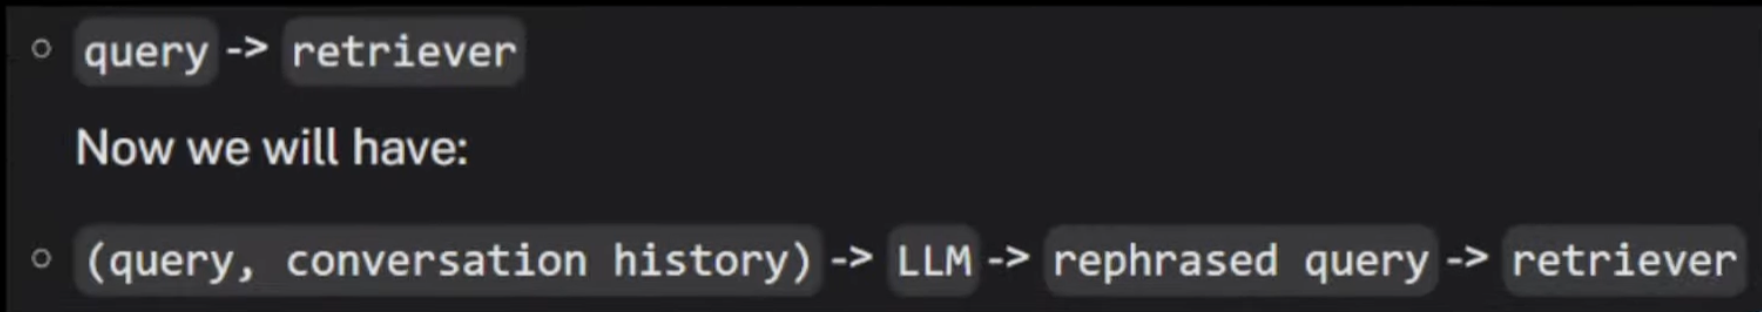

# History Aware Retriever

### 1. Manually adding chat history

In [ ]:
from langchain.chains import create_retrieval_chain, create_history_aware_retriever
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

### Contextualize question

In [ ]:

contextualize_q_system_prompt = (
    "Given a chat history and the latest user question which might reference context in the chat history, "
    "formulate a standalone question which can be understood without the chat history."
    "Do NOT answer the question, just reformulate it if needed and otherwise return it as is."
)

In [ ]:
contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", contextualize_q_system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)

In [ ]:
history_aware_retriever = create_history_aware_retriever(
    llm,
    retriever,
    contextualize_q_prompt
)

In [ ]:
history_aware_retriever

RunnableBinding(bound=RunnableBranch(branches=[(RunnableLambda(lambda x: not x.get('chat_history', False)), RunnableLambda(lambda x: x['input'])
| VectorStoreRetriever(tags=['Chroma', 'OpenAIEmbeddings'], vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x7c27961bfb80>, search_kwargs={}))], default=ChatPromptTemplate(input_variables=['chat_history', 'input'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')]

### Answer Question

In [ ]:
system_prompt = (
    "You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question."
    "If you don't know the answer, say that you don't know."
    "Use three sentences maximum and keep the answer concise."
    "\n\n"
    "{context}"
)

In [ ]:
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)

## Chain

In [ ]:
qa_chain = create_stuff_documents_chain(llm, qa_prompt)

In [ ]:
rag_chain = create_retrieval_chain(
    history_aware_retriever,
    qa_chain
)

# Run

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage

In [ ]:
chat_history = []

In [ ]:
user_input = "How many earned leaves do i get per quarter?"
response = rag_chain.invoke({
    "input" : user_input,
    "chat_history" : chat_history
})
response['answer']

'According to the provided information, employees receive 16 earned leaves per year, or four per quarter.'

In [ ]:
chat_history.extend([
    HumanMessage(content=user_input),
    AIMessage(content=response['answer'])
])

In [ ]:
user_input = "Can I wear jersey on monday?"
response = rag_chain.invoke({
    "input" : user_input,
    "chat_history" : chat_history
})
response['answer']

'According to the provided information, on Mondays, employees are expected to wear formal full-sleeved shirts, which includes business casuals.'

In [ ]:
chat_history.extend([
    HumanMessage(content=user_input),
    AIMessage(content=response['answer'])
])

In [ ]:
chat_history

[HumanMessage(content='How many earned leaves do i get per quarter?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='According to the provided information, employees receive 16 earned leaves per year, or four per quarter.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Can I wear jersey on monday?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='According to the provided information, on Mondays, employees are expected to wear formal full-sleeved shirts, which includes business casuals.', additional_kwargs={}, response_metadata={})]

# 2. Using BaseChatMessageHistory

In [ ]:
from langchain.chains import create_retrieval_chain, create_history_aware_retriever
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

### Contextualize question

In [ ]:
contextualize_q_system_prompt = (
    "Given a chat history and the latest user question which might reference context in the chat history, "
    "formulate a standalone question which can be understood without the chat history."
    "Do NOT answer the question, just reformulate it if needed and otherwise return it as is."
)

In [ ]:
contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", contextualize_q_system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)

In [ ]:
history_aware_retriever = create_history_aware_retriever(
    llm,
    retriever,
    contextualize_q_prompt
)

### Answer question

In [ ]:
system_prompt = (
    "You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question."
    "If you don't know the answer, say that you don't know."
    "Use three sentences maximum and keep the answer concise."
    "\n\n"
    "{context}"
)

In [ ]:
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)

## Chain

In [ ]:
qa_chain = create_stuff_documents_chain(llm, qa_prompt)

In [ ]:
rag_chain = create_retrieval_chain(
    history_aware_retriever,
    qa_chain
)

## Statefully manage chat history

In [ ]:
store = {}

In [ ]:
def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = ChatMessageHistory()
    return store[session_id]

In [ ]:
conversational_rag_chain = RunnableWithMessageHistory(
    rag_chain,
    get_session_history,
    input_messages_key="input",
    history_messages_key="chat_history",
    output_messages_key="answer",
)

# Run

In [ ]:
config={
        "configurable": {
            "session_id": "abc123"
            }
        # constructs a key "abc123" in `store`
    }

In [ ]:
user_input = "Can I wear jersey on monday?"
response = conversational_rag_chain.invoke(
    {"input": user_input},
    config=config
)["answer"]

In [ ]:
response

'According to the Workplace Attire Policy (Dress Code), on Mondays, employees are expected to wear formal business casual attire, which includes business casuals. This means that wearing a jersey on Monday would not be in compliance with the dress code.'

In [ ]:
user_input = "When can i wear it then?"
response = conversational_rag_chain.invoke(
    {"input": user_input},
    config=config
)["answer"]

In [ ]:
response

'According to the Workplace Attire Policy (Dress Code), employees can wear casual, half-sleeved shirts, collared t-shirts, golf/polo shirts, turtlenecks, trousers, jeans, and casual shoes on Fridays.'

In [ ]:
user_input = "Is that considered to be a casual?"
response = conversational_rag_chain.invoke(
    {"input": user_input},
    config=config
)["answer"]

In [ ]:
response

'No, according to the Workplace Attire Policy (Dress Code), business casuals are defined as Monday through Thursday, which means that wearing a jersey on Fridays would not be considered business casual.'